In [1]:
import pandas as pd

In [2]:
seed=456

In [3]:
#Abro el archivo con la informacion

#Normalizada
#data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')

#Sin normalizar
data = pd.read_csv('attritionDataWithDummyVars.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [7]:
pd.DataFrame(y_train).Dummy_Attrition_Yes.value_counts()

0    863
1    166
Name: Dummy_Attrition_Yes, dtype: int64

In [8]:
pd.DataFrame(y_test).Dummy_Attrition_Yes.value_counts()

0    370
1     71
Name: Dummy_Attrition_Yes, dtype: int64

### Oversampling with SMOTE

In [9]:
#%pip install imblearn
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=seed,sampling_strategy=0.3)

In [11]:
sm_x,sm_y=sm.fit_resample(x_train, y_train)

In [12]:
columns=x_train.columns

In [13]:
sm_x_df = pd.DataFrame(data=sm_x,columns=columns )
sm_y_df= pd.DataFrame(data=sm_y,columns=['Dummy_Attrition_Yes'])

In [14]:
# we can Check the numbers of our data
print("\033[1m Length of oversampled data is:",len(sm_x_df))
print("\033[1m Number of default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1]))
print("\033[1m Number of no-default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0]))
print("\033[1m Proportion of default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1])/len(sm_x_df))
print("\033[1m Proportion of no-default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0])/len(sm_x_df))

 Length of oversampled data is: 1121
 Number of default in oversampled data is: 258
 Number of no-default in oversampled data is: 863
 Proportion of default data in oversampled data is: 0.23015165031222123
 Proportion of no-default data in oversampled data is: 0.7698483496877788


In [15]:
pd.DataFrame(sm_y_df).Dummy_Attrition_Yes.value_counts()

0    863
1    258
Name: Dummy_Attrition_Yes, dtype: int64

In [16]:
#Comment this 2 lines if you dont want oversampling
#x_train=sm_x_df
#y_train=sm_y_df

### Oversampling with ADASYN

In [17]:
from imblearn.over_sampling import ADASYN

In [18]:
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=5, random_state=seed)

#sampling_percentage = 0.3
#adasyn = ADASYN(sampling_strategy=sampling_percentage, n_neighbors=5, random_state=seed)

In [19]:
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

In [20]:
pd.DataFrame(y_resampled).Dummy_Attrition_Yes.value_counts()

0    863
1    844
Name: Dummy_Attrition_Yes, dtype: int64

In [21]:
#Comment this 2 lines if you dont want oversampling
x_train=x_resampled
y_train=y_resampled

## lightgbm 

In [22]:
#%pip install lightgbm
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=seed)
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 844, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1419
[LightGBM] [Info] Number of data points in the train set: 1707, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494435 -> initscore=-0.022262
[LightGBM] [Info] Start training from score -0.022262


LGBMClassifier(random_state=456)

In [23]:
from sklearn.metrics import accuracy_score

y_aux = model.predict(x_train)
accuracy_score(y_train, y_aux) #evaluo cuan bien predice el training set para ver comparar con el test y ver si overfitea o underfitea

1.0

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8616780045351474

In [26]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[358  12]
 [ 49  22]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.65      0.31      0.42        71

    accuracy                           0.86       441
   macro avg       0.76      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441



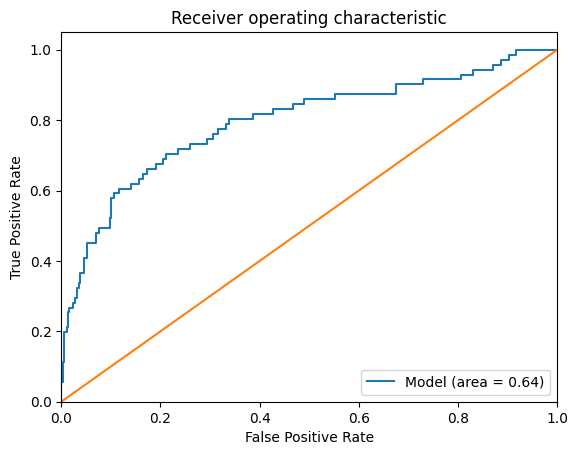

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

<AxesSubplot: >

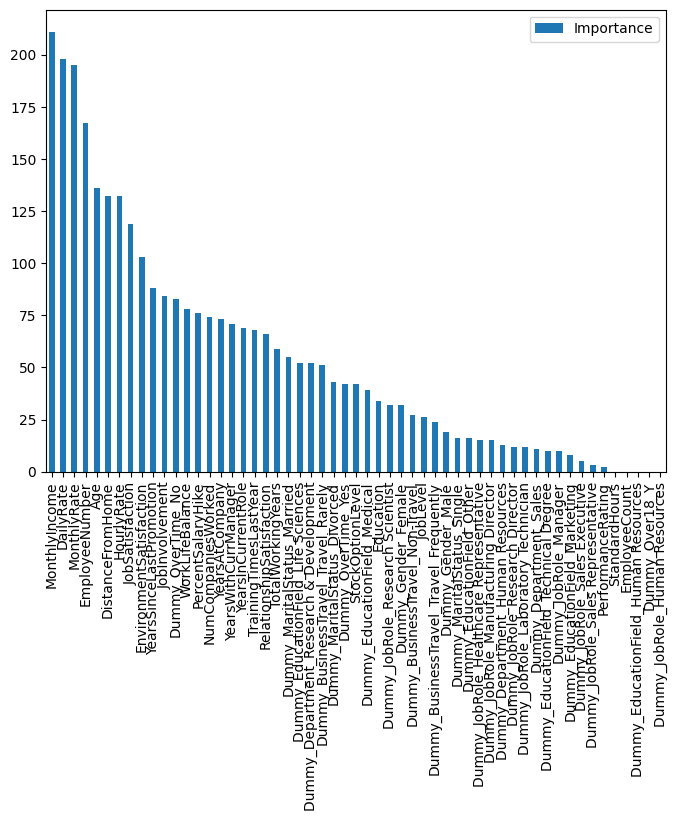

In [29]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Optimizacion Bayesiana

In [30]:
#%pip uninstall scikit-learn
#%pip install scikit-learn
#%pip show scikit-learn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', category=FutureWarning)

In [31]:
from bayes_opt import BayesianOptimization

In [32]:
#Defines the function to maximize adding a cross validation feature to prevent overfitting 

import numpy as np

from sklearn.model_selection import cross_val_score

def boParams(num_leaves, min_data_in_leaf, learning_rate, min_sum_hessian_in_leaf, feature_fraction, lambda_l1,
                 lambda_l2, min_gain_to_split, max_depth, bagging_fraction, subsample,max_bin):
    
  
    params = {
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'min_data_in_leaf': int(min_data_in_leaf),
        'min_gain_to_split': min_gain_to_split,
        'min_sum_hessian_in_leaf': min_sum_hessian_in_leaf,
        'num_leaves': int(num_leaves),
        'bagging_fraction': bagging_fraction,
        'feature_fraction': feature_fraction,
        'max_bin': int(max_bin),
        'subsample':subsample,
        #'bagging_fraction': 0.8,
        #'bagging_freq': 6,
        #'save_binary': True,
        #'seed': 7,
        #'feature_fraction_seed': 7,
        #'bagging_seed': 7,
        #'drop_seed': 7,
        #'data_random_seed': 7,
        #'objective': 'binary',
        #'boosting_type': 'gbdt',
        #'metric': 'auc',
        #'is_unbalance': True,
        #'boost_from_average': True,
        #'n_jobs': -1,
        'verbose': -1
    }
  
    
    result = cross_val_score(lgb.LGBMClassifier(random_state=seed, **params),
                             x_train, y_train,cv=3,scoring="f1_weighted")
    
    if np.isnan(result.mean()):
        return(0)
    #cv_result = xgb.cv(params, train_dmatrix, nfold=5)
    return result.mean()
    #return result.min()


#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html


In [33]:
# Sets the limits for the iteration of the different parameters

bo = BayesianOptimization(boParams, {
    'lambda_l1': (0., 10.),
    'lambda_l2': (0., 10.),
    'learning_rate': (0.01, 1),
    'max_depth': (2, 30),
    'min_data_in_leaf': (5, 80),
    'min_gain_to_split': (0, 1),
    'bagging_fraction': (0.8, 1),
    'min_sum_hessian_in_leaf': (0, 100),
    'feature_fraction': (0.1, 0.9),
    'max_bin':(20,90),
    'subsample': (0.01, 1.0),
    'num_leaves': (10, 80)    
},random_state=seed)

In [34]:
results = bo.maximize(n_iter=100, init_points=16)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... |  max_bin  | max_depth | min_da... | min_ga... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.881     | 0.8498    | 0.2305    | 7.836     | 8.085     | 0.6294    | 62.29     | 26.8      | 61.93     | 0.1811    | 15.02     | 40.5      | 0.3914    |
| 2         | 0.8813    | 0.9151    | 0.2169    | 6.866     | 4.688     | 0.5743    | 65.2      | 22.25     | 56.05     | 0.1809    | 11.82     | 26.99     | 0.0181    |
| 3         | 0.8689    | 0.872     | 0.2168    | 5.427     | 8.571     | 0.2082    | 29.42     | 7.981     | 77.99     | 0.8583    | 53.38     | 40.41     | 0.1953    |
| 4         | 0.8564    | 0.8577    | 0.6017    | 3.557     | 7.295     | 0.5614    | 85.97     | 6.299     | 72.22     | 0.178     | 59.43     | 12.9

| 29        | 0.875     | 0.9008    | 0.1       | 7.973     | 7.325     | 0.3671    | 60.34     | 27.04     | 68.32     | 0.0       | 15.69     | 27.81     | 0.01      |
| 30        | 0.8692    | 0.8187    | 0.1       | 9.927     | 4.546     | 0.5722    | 71.68     | 26.7      | 60.86     | 0.0       | 22.51     | 31.97     | 0.01      |
| 31        | 0.8606    | 0.8       | 0.1704    | 10.0      | 0.5893    | 0.01      | 63.72     | 30.0      | 59.72     | 0.009305  | 3.131     | 29.76     | 0.3561    |
| 32        | 0.8799    | 1.0       | 0.1       | 4.693     | 4.971     | 0.5312    | 30.29     | 12.81     | 37.74     | 0.7338    | 28.26     | 32.24     | 0.8913    |
| 33        | 0.8888    | 1.0       | 0.1       | 0.7456    | 0.0       | 0.9242    | 37.91     | 8.719     | 30.61     | 0.0       | 22.44     | 34.56     | 0.01      |
| 34        | 0.8862    | 1.0       | 0.1       | 3.339     | 9.6       | 0.4617    | 32.45     | 5.104     | 31.96     | 0.0       | 17.55     | 31.2

| 58        | 0.8871    | 1.0       | 0.1       | 8.717     | 0.0       | 0.2628    | 80.04     | 21.07     | 53.48     | 0.0       | 10.89     | 16.14     | 0.01      |
| 59        | 0.8774    | 1.0       | 0.8182    | 2.153     | 5.134     | 0.3244    | 90.0      | 26.85     | 53.39     | 1.0       | 17.81     | 16.23     | 0.01      |
| 60        | 0.8878    | 1.0       | 0.1       | 0.0       | 0.0       | 1.0       | 82.24     | 24.93     | 48.14     | 0.0       | 0.0       | 15.22     | 0.01      |
| 61        | 0.8765    | 0.8361    | 0.2501    | 2.879     | 2.573     | 0.139     | 32.17     | 16.09     | 36.71     | 0.611     | 28.62     | 30.15     | 0.8847    |
| 62        | 0.8736    | 1.0       | 0.1       | 7.952     | 3.291     | 0.9774    | 77.01     | 30.0      | 40.99     | 0.0       | 7.382     | 19.65     | 0.01      |
| 63        | 0.8788    | 0.9727    | 0.1       | 0.0       | 0.0       | 1.0       | 87.86     | 14.31     | 58.49     | 0.0       | 2.171     | 17.0

| 88        | 0.8589    | 0.9671    | 0.8888    | 8.987     | 9.709     | 0.5631    | 63.19     | 14.87     | 76.25     | 0.735     | 32.77     | 64.88     | 0.4568    |
| 89        | 0.8574    | 1.0       | 0.9       | 0.0       | 0.0       | 1.0       | 46.67     | 30.0      | 80.0      | 0.0       | 42.68     | 55.4      | 1.0       |
| 90        | 0.8825    | 0.9506    | 0.1       | 0.0       | 10.0      | 1.0       | 90.0      | 20.5      | 30.15     | 0.0       | 5.052     | 33.99     | 0.01      |
| 91        | 0.8623    | 0.8677    | 0.8941    | 9.211     | 5.172     | 0.6248    | 89.45     | 12.63     | 33.65     | 0.6636    | 13.19     | 26.64     | 0.7757    |
| 92        | 0.8813    | 0.9213    | 0.7963    | 1.123     | 9.351     | 0.6217    | 88.75     | 24.0      | 10.36     | 0.9842    | 5.054     | 44.24     | 0.3008    |
| 93        | 0.8931    | 0.8       | 0.1       | 0.0       | 0.0       | 0.9368    | 90.0      | 30.0      | 23.08     | 0.0       | 0.0       | 36.7

In [35]:
#Prints optimal parameters
params = bo.max['params']
print(params)

{'bagging_fraction': 1.0, 'feature_fraction': 0.1, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'learning_rate': 1.0, 'max_bin': 77.56500063070102, 'max_depth': 30.0, 'min_data_in_leaf': 5.0, 'min_gain_to_split': 0.0, 'min_sum_hessian_in_leaf': 0.0, 'num_leaves': 50.21370427523268, 'subsample': 1.0}


In [36]:
#Cast the parameters to the correct format
params['max_depth']= int(params['max_depth'])
params['num_leaves']= int(params['num_leaves'])
params['min_data_in_leaf']= int(params['min_data_in_leaf'])
params['max_bin']= int(params['max_bin'])

In [37]:
#I use the traning data to train the model and get the performance indicator. The idea is to compare with the testing
#indicators to make sure there is no overfitting 

modelTraining = lgb.LGBMClassifier(**params,random_state=seed)
modelTraining.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Cu

LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.1, lambda_l1=0.0,
               lambda_l2=0.0, learning_rate=1.0, max_bin=77, max_depth=30,
               min_data_in_leaf=5, min_gain_to_split=0.0,
               min_sum_hessian_in_leaf=0.0, num_leaves=50, random_state=456)

In [38]:
 predictionTraining = modelTraining.predict(x_train)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


In [39]:
#Prints the report for training data
print(classification_report(y_train,predictionTraining))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       844

    accuracy                           1.00      1707
   macro avg       1.00      1.00      1.00      1707
weighted avg       1.00      1.00      1.00      1707



In [40]:
#Now the model is trained with training and testing data but using testing data to evaluate
modelTest = lgb.LGBMClassifier(**params,random_state=seed)
modelTest.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Cu

LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.1, lambda_l1=0.0,
               lambda_l2=0.0, learning_rate=1.0, max_bin=77, max_depth=30,
               min_data_in_leaf=5, min_gain_to_split=0.0,
               min_sum_hessian_in_leaf=0.0, num_leaves=50, random_state=456)

In [41]:
#Predicts using testing data
predictionTest = modelTest.predict(x_test)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


In [42]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,predictionTest))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.60      0.30      0.40        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.83       441



In [43]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, predictionTest)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[356  14]
 [ 50  21]]


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1

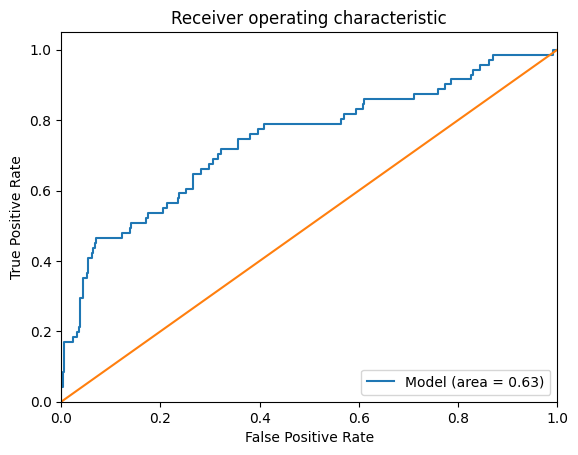

In [44]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, modelTest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modelTest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

<AxesSubplot: >

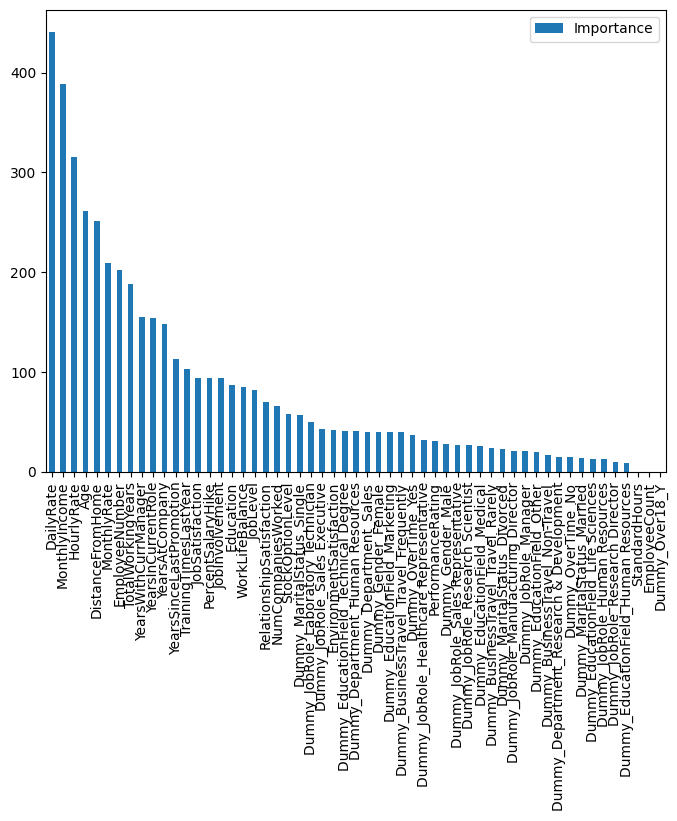

In [45]:
#Prints the feature importance
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(modelTest.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Semillerio

In [46]:
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def generate_primes(n):
    primes = []
    num = 2 + seed
    while len(primes) < n:
        if is_prime(num):
            primes.append(num)
        num += 1
    return primes

In [47]:
n=30

In [48]:
import numpy as np
prime_list = generate_primes(n)
yPredSem=np.zeros_like(y_test)

In [49]:
for prime in prime_list:
    modelSem = lgb.LGBMClassifier(**params,random_state=prime)
    modelSem.fit(x_train,y_train)
    pred = modelSem.predict(x_test)
    yPredSem=yPredSem+pred
    
    

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Cu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


In [50]:
yPredSem=np.round(yPredSem / n).astype(int)

In [51]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,yPredSem))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.77      0.34      0.47        71

    accuracy                           0.88       441
   macro avg       0.83      0.66      0.70       441
weighted avg       0.87      0.88      0.86       441



In [52]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, yPredSem)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[363   7]
 [ 47  24]]


In [53]:
model_roc_auc = roc_auc_score(y_test,yPredSem)
model_roc_auc

0.6595546250475828

In [54]:
aux=x_test
aux['predict']=yPredSem
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
192,261,1
1384,1950,0
558,772,0
50,64,0
702,982,0
...,...,...
112,148,0
1135,1602,0
1359,1915,0
962,1352,0


### Export results to CSV

In [ ]:
aux.to_csv('AttrttionResultsLGBM', index=False) 